In [3]:
import pandas as pd
from catboost import Pool, CatBoostClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

In [4]:
train_data = pd.read_csv("../datasets/train_with_embeddings.csv")
test_data = pd.read_csv("../datasets/test_with_embeddings.csv")

In [12]:
test_data.query('label == 0').head(5).values

array([["Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.",
        0, 2,
        'once again mr costner ha dragged out a movie for far longer than 

In [9]:
train_data.head()

,text,label,ratings,clean_text,text_embedding
0,Bromwell High is a cartoon comedy. It ran at t...,1,9,bromwell high is a cartoon comedy it ran at th...,"[0.8779181241989136, 0.3795791566371918, -0.15..."
1,Homelessness (or Houselessness as George Carli...,1,8,homelessness or houselessness a george carlin ...,"[0.7185903787612915, 0.16849711537361145, -0.4..."
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,10,brilliant overacting by lesley ann warren best...,"[1.2952933311462402, -0.03307562321424484, -0...."
3,This is easily the most underrated film inn th...,1,7,this is easily the most underrated film inn th...,"[0.7549100518226624, 1.3669123649597168, -0.31..."
4,This is not the typical Mel Brooks film. It wa...,1,8,this is not the typical mel brook film it wa m...,"[0.5853791236877441, 0.4199213683605194, -1.60..."


<Axes: xlabel='label', ylabel='count'>

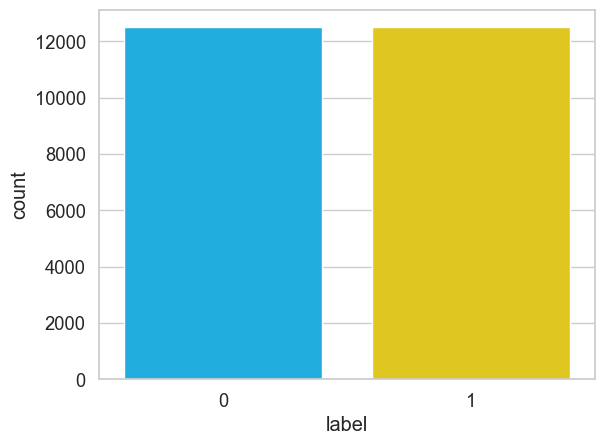

In [33]:
sns.countplot(data=train_data, x='label')

<Axes: xlabel='label', ylabel='ratings'>

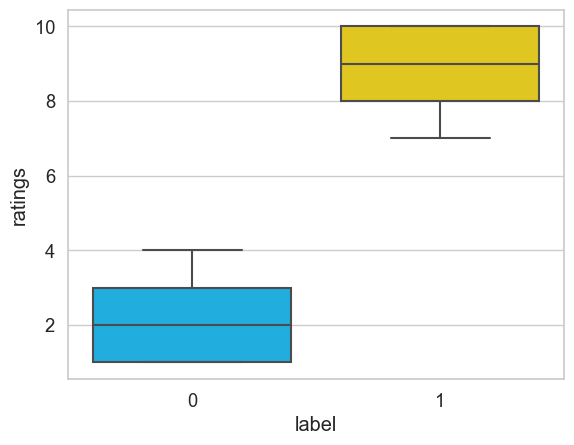

In [17]:
sns.boxplot(x='label', y='ratings', data=train_data)

In [31]:
train_data['text_length'] = train_data['text'].apply(lambda x: len(x)) # length of the text
train_data.head()

,text,label,ratings,clean_text,text_embedding,text_legnth,text_length
0,Bromwell High is a cartoon comedy. It ran at t...,1,9,bromwell high is a cartoon comedy it ran at th...,"[0.8779181241989136, 0.3795791566371918, -0.15...",806,806
1,Homelessness (or Houselessness as George Carli...,1,8,homelessness or houselessness a george carlin ...,"[0.7185903787612915, 0.16849711537361145, -0.4...",2366,2366
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,10,brilliant overacting by lesley ann warren best...,"[1.2952933311462402, -0.03307562321424484, -0....",841,841
3,This is easily the most underrated film inn th...,1,7,this is easily the most underrated film inn th...,"[0.7549100518226624, 1.3669123649597168, -0.31...",663,663
4,This is not the typical Mel Brooks film. It wa...,1,8,this is not the typical mel brook film it wa m...,"[0.5853791236877441, 0.4199213683605194, -1.60...",647,647


<Axes: xlabel='label', ylabel='text_length'>

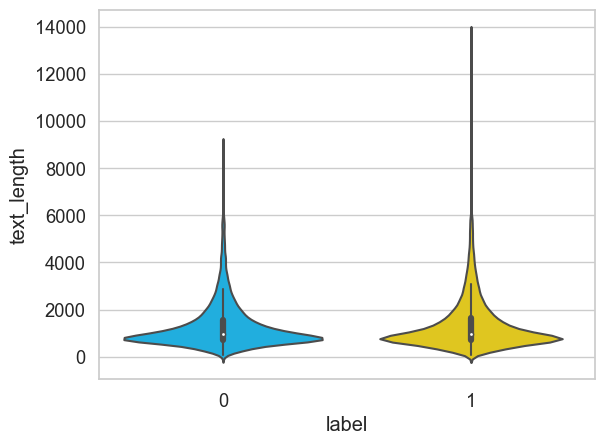

In [37]:
sns.violinplot(x='label', y='text_length', data=train_data)

c:\Users\hwndr\miniconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hwndr\miniconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hwndr\miniconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0, 0.5, 'text Length')

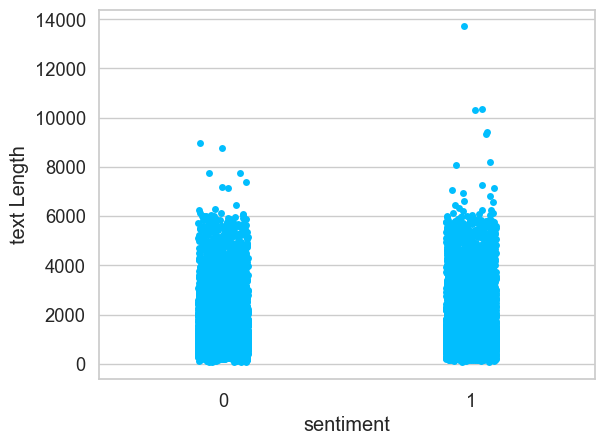

In [39]:
sns.stripplot(x='label', y='text_length', data=train_data, jitter=True)
plt.xlabel('sentiment')
plt.ylabel('text Length')

In [5]:
import ast
def convert_embedding(embedding_str):
    return np.array(ast.literal_eval(embedding_str))

In [65]:
train_data['text_embedding'] = train_data['text_embedding'].apply(convert_embedding)
test_data['text_embedding'] = test_data['text_embedding'].apply(convert_embedding)

In [66]:
train_data.head()

,text,label,ratings,clean_text,text_embedding
0,Bromwell High is a cartoon comedy. It ran at t...,1,9,bromwell high is a cartoon comedy it ran at th...,"[0.8779181241989136, 0.3795791566371918, -0.15..."
1,Homelessness (or Houselessness as George Carli...,1,8,homelessness or houselessness a george carlin ...,"[0.7185903787612915, 0.16849711537361145, -0.4..."
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,10,brilliant overacting by lesley ann warren best...,"[1.2952933311462402, -0.03307562321424484, -0...."
3,This is easily the most underrated film inn th...,1,7,this is easily the most underrated film inn th...,"[0.7549100518226624, 1.3669123649597168, -0.31..."
4,This is not the typical Mel Brooks film. It wa...,1,8,this is not the typical mel brook film it wa m...,"[0.5853791236877441, 0.4199213683605194, -1.60..."


In [73]:
train_embeddings = np.array(train_data['text_embedding'].tolist())
test_embeddings = np.array(test_data['text_embedding'].tolist())

In [74]:
train_pool = Pool(train_embeddings, train_data['label'])

In [75]:
clf = CatBoostClassifier(task_type='GPU', 
                         devices='0', 
                         loss_function='Logloss',
                         iterations=500,
                         learning_rate=0.1,
                         depth=6,
                         eval_metric='AUC',
                         verbose=100,
                         random_seed=42)

In [76]:
clf.fit(train_pool, eval_set=(test_embeddings, test_data['label']), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8837945	best: 0.8837945 (0)	total: 146ms	remaining: 1m 12s
100:	test: 0.9723405	best: 0.9723405 (100)	total: 9.65s	remaining: 38.1s
200:	test: 0.9743395	best: 0.9743395 (200)	total: 18.8s	remaining: 28s
300:	test: 0.9753341	best: 0.9753361 (295)	total: 27.9s	remaining: 18.4s
400:	test: 0.9757165	best: 0.9757187 (395)	total: 36.4s	remaining: 8.98s
499:	test: 0.9758016	best: 0.9758087 (475)	total: 45s	remaining: 0us
bestTest = 0.9758087397
bestIteration = 475
Shrink model to first 476 iterations.


In [77]:
y_pred = clf.predict(test_embeddings)

In [79]:
from sklearn.metrics import classification_report

print(classification_report(test_data['label'], y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     12500
           1       0.91      0.94      0.92     12500

    accuracy                           0.92     25000
   macro avg       0.92      0.92      0.92     25000
weighted avg       0.92      0.92      0.92     25000



In [80]:
clf.save_model("../files/classification_model.cbm")